In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# splitting the data into test and train set
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt

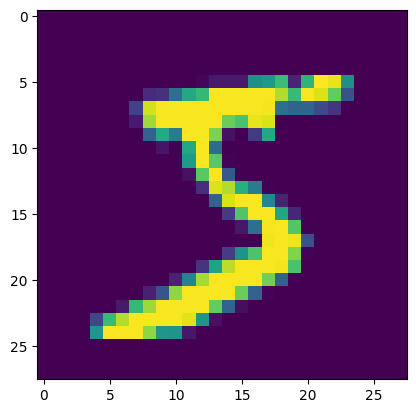

In [ ]:
plt.imshow(X_train[0].reshape(28,28))

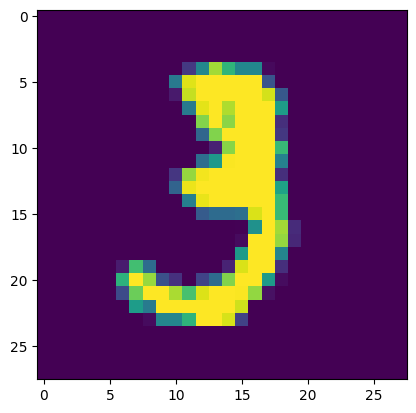

In [ ]:
plt.imshow(X_train[10].reshape(28,28))

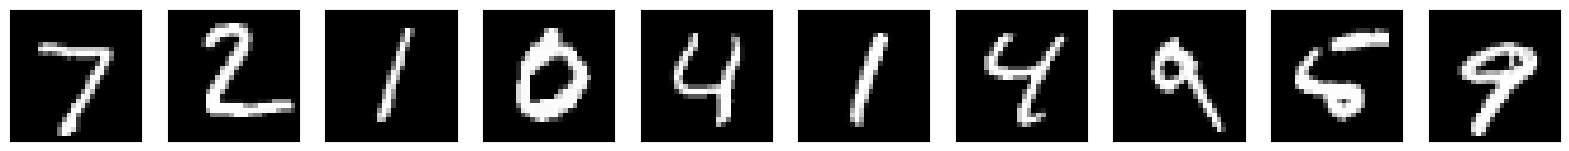

In [ ]:
import matplotlib.pyplot as plt

# Number of digits to display
n = 10

# Create a figure to display the images
plt.figure(figsize=(20, 8))

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Display the original image
    plt.imshow(X_test[i].reshape(28, 28))

    # Set colormap to grayscale
    plt.gray()

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the figure with the images
plt.show()

# Close the figure
plt.close()

In [ ]:
# Reshape training and testing data to a flat format (flattening the images)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

# Normalize the data sets
X_train /= 255
X_test /= 255

In [ ]:
# Number of classes in the dataset
classes = 10
# Convert the labels to one-hot encoded format
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)

# Print the shapes of the preprocessed training data and labels
print(f"New X_train shape: {X_train.shape}")
print(f"New Y_train shape: {Y_train.shape}")

New X_train shape: (60000, 784)
New Y_train shape: (60000, 10)


In [ ]:
# Define the input size for each data sample (e.g., image pixels)
input_size = 784

# Specify the number of data samples to process in each batch
batch_size = 200

# Define the number of neurons in the first hidden layer
hidden1 = 400

# Define the number of neurons in the second hidden layer
hidden2 = 20

# Define the total number of classes/categories in the dataset
classes = 10

# Set the number of complete passes through the dataset during training
epochs = 5

# **Building the Model**

In [ ]:
model=Sequential()
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
model.add(Dense(hidden2, activation='relu'))
model.add(Dense(classes, activation='softmax'))

In [ ]:
# Compile the model by specifying the loss function, optimizer, and evaluation metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='sgd')

# Display a summary of the model architecture, showing the layers and parameter counts
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 20)                8020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 322230 (1.23 MB)
Trainable params: 322230 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Model Training**

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/5
300/300 [==============================] - 3s 7ms/step - loss: 1.5796 - accuracy: 0.5621
Epoch 2/5
300/300 [==============================] - 2s 7ms/step - loss: 0.7192 - accuracy: 0.8310
Epoch 3/5
300/300 [==============================] - 2s 7ms/step - loss: 0.4948 - accuracy: 0.8709
Epoch 4/5
300/300 [==============================] - 3s 11ms/step - loss: 0.4128 - accuracy: 0.8872
Epoch 5/5
300/300 [==============================] - 2s 8ms/step - loss: 0.3689 - accuracy: 0.8967


# Model Accuracy

In [ ]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, Y_test)
print("\nTest accuracy: {}".format(test_accuracy))



Test accuracy: 0.8695


In [17]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = X_test[20:40]
actual_labels = Y_test[20:40]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

1/1 [==============================] - 0s 62ms/step


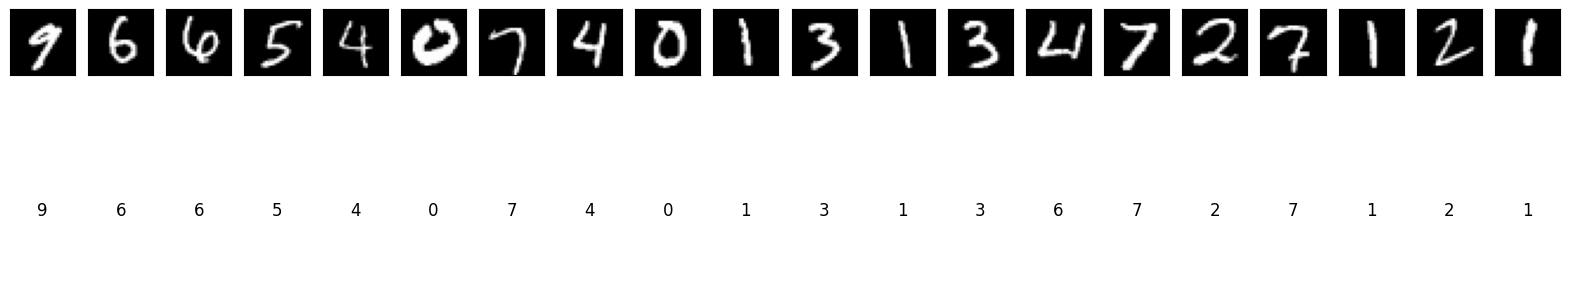

In [18]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()